# Q1.
## Q1.1
Using make_regression to generate data, create and train the following models:
- Linear Regression
- Support Vector Regression ([see here](https://scikit-learn.org/stable/modules/svm.html#regression))
- Decision Tree Regression ([see here](https://scikit-learn.org/stable/modules/tree.html#regression))

Make sure to use the same data for each model. Plot the data labels and overlay model predictions. Which model performs better? For the SVR, change the `kernel` parameter between 'rbf','linear', and 'poly'.

In [1]:
# Import statements
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Data
x_data, y_label, coef = make_regression(n_samples=100, n_features=5, n_informative=3, noise=20, coef=True)
x_data_train, x_data_test, y_label_train, y_label_test = train_test_split(x_data, y_label, train_size=0.8)

# Models and scores
lr = LinearRegression()
lr.fit(x_data_train, y_label_train)
print('Linear: ' + str(lr.score(x_data_test, y_label_test)))

svr0 = SVR(kernel='linear')
svr0.fit(x_data_train, y_label_train)
print('SVR (linear): ' + str(svr0.score(x_data_test, y_label_test)))

svr1 = SVR(kernel='poly')
svr1.fit(x_data_train, y_label_train)
print('SVR (poly): ' + str(svr1.score(x_data_test, y_label_test)))

svr2 = SVR(kernel='rbf')
svr2.fit(x_data_train, y_label_train)
print('SVR (rbf): ' + str(svr2.score(x_data_test, y_label_test)))

dtr = DecisionTreeRegressor()
dtr.fit(x_data_train, y_label_train)
print('Decision Tree: ' + str(dtr.score(x_data_test, y_label_test)))

Linear: 0.9388351247261595
SVR (linear): 0.6506201272050718
SVR (poly): 0.1638419676933902
SVR (rbf): 0.051528185817098615
Decision Tree: 0.6026293671419065


## Q1.2
Create a new function, similar to "create_data" in Section 1 exercises. Instead of a weighted sum, implement the following:  

\begin{equation}
y = A*sin(f x) + V*noise
\end{equation}

The function should meet the following specifications:
- x is a user-specified [n by 1] array, where n is the number of elements.  
- A is a user-specified scalar. It corresponds to the amplitude of the sine.  
- f is a user-specified scalar. It corresponds to the frequency of the sine.  
- V is a user-specified sclar. It corresponds to the variance of the noise.  
- noise is a normally-distributed random value added to each sample.  
- y is the returned [n by 1] array.  
  
Re-initialize models from Q1.1 and train them on (x, y). Plot the data labels and overlay predictions. Which models perform better?  
Hint: numpy.sin ; numpy.random.randn

Linear: 0.0753934825108773
SVR (rbf): 0.9793839155763614
SVR (poly): 0.3485072928074774
SVR (linear): 0.08350186542978022
Decision Tree: 0.9597433228580369


Text(0.5, 1.0, 'Decision Tree Regression')

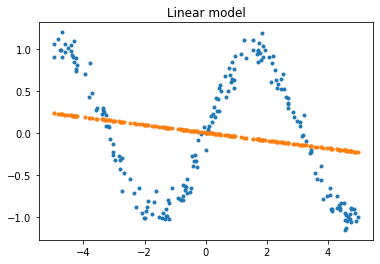

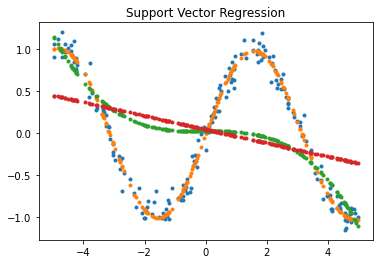

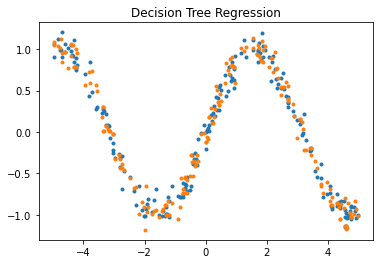

In [4]:
# Import statements
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Data function
def create_data(x, amplitude=1, freq=1, noise_std=1):
    return np.squeeze(amplitude*np.sin(freq*x) + noise_std *np.random.randn(*x.shape))

# Data generation
x_data = (np.random.rand(1000,1)-0.5)*10
y_label = create_data(x_data, noise_std=0.1)
x_data_train, x_data_test, y_label_train, y_label_test = train_test_split(x_data, y_label, train_size=0.8)


# Models and plots
lr = LinearRegression()
lr.fit(x_data_train, y_label_train)
print('Linear: ' + str(lr.score(x_data_test, y_label_test)))
lr_pred = lr.predict(x_data_test)
plt.figure()
plt.plot(x_data_test, y_label_test, '.')
plt.plot(x_data_test, lr_pred, '.')
plt.title('Linear model')

svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_data_train, y_label_train)
print('SVR (rbf): ' + str(svr_rbf.score(x_data_test, y_label_test)))
svr_rbf_pred = svr_rbf.predict(x_data_test)

svr_poly = SVR(kernel='poly')
svr_poly.fit(x_data_train, y_label_train)
print('SVR (poly): ' + str(svr_poly.score(x_data_test, y_label_test)))
svr_poly_pred = svr_poly.predict(x_data_test)

svr_linear = SVR(kernel='linear')
svr_linear.fit(x_data_train, y_label_train)
print('SVR (linear): ' + str(svr_linear.score(x_data_test, y_label_test)))
svr_linear_pred = svr_linear.predict(x_data_test)

plt.figure()
plt.plot(x_data_test, y_label_test, '.')
plt.plot(x_data_test, svr_rbf_pred, '.')
plt.plot(x_data_test, svr_poly_pred, '.')
plt.plot(x_data_test, svr_linear_pred, '.')
plt.legend(['Data','RBF kernel','Polynomial kernel',''])
plt.title('Support Vector Regression')


dtr = DecisionTreeRegressor()
dtr.fit(x_data_train, y_label_train)
print('Decision Tree: ' + str(dtr.score(x_data_test, y_label_test)))
dtr_pred = dtr.predict(x_data_test)
plt.figure()
plt.plot(x_data_test, y_label_test, '.')
plt.plot(x_data_test, dtr_pred, '.')
plt.title('Decision Tree Regression')

## Q1.3
Using the noisy sine function from Q1.2, generate new data. Use `PolynomialFeatures` as we did in Section 1 to create powers of our features (`x`). Training the models from Q1.2 using our new `x_poly` features, how do the models trained on `x_poly` compare to the ones trained on `x` in Q1.2?

Linear: 0.975680104887151
SVR (poly): 0.2993192689211275
Decision Tree: 0.9613239680199197


Text(0.5, 1.0, 'Decision Tree Regression')

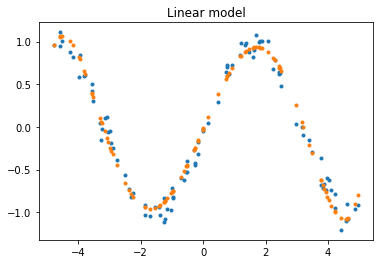

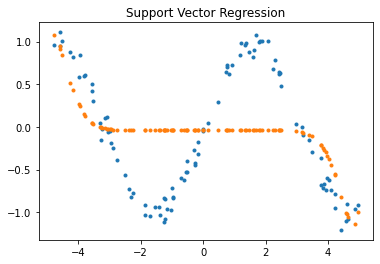

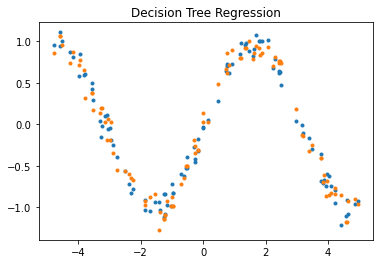

In [3]:
# Import statements
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Data function
def create_data(x, amplitude=1, freq=1, noise_std=1):
    return np.squeeze(amplitude*np.sin(freq*x) + noise_std *np.random.randn(*x.shape))

# Data generation
x_data = (np.random.rand(500,1)-0.5)*10
y_label = create_data(x_data, noise_std=0.1)
x_data_train, x_data_test, y_label_train, y_label_test = train_test_split(x_data, y_label, train_size=0.8)

# Polynomial features
poly_feat_maker = PolynomialFeatures(degree=5)  # Initialize object
x_poly_train = poly_feat_maker.fit_transform(x_data_train)  # Apply transformation
x_poly_test = poly_feat_maker.fit_transform(x_data_test)


# Plots
lr = LinearRegression()
lr.fit(x_poly_train, y_label_train)
print('Linear: ' + str(lr.score(x_poly_test, y_label_test)))
lr_pred = lr.predict(x_poly_test)
plt.figure()
plt.plot(x_data_test, y_label_test, '.')
plt.plot(x_data_test, lr_pred, '.')
plt.title('Linear model')

svr = SVR(kernel='poly')
svr.fit(x_poly_train, y_label_train)
print('SVR (poly): ' + str(svr.score(x_poly_test, y_label_test)))
svr_pred = svr.predict(x_poly_test)
plt.figure()
plt.plot(x_data_test, y_label_test, '.')
plt.plot(x_data_test, svr_pred, '.')
plt.title('Support Vector Regression')

dtr = DecisionTreeRegressor()
dtr.fit(x_poly_train, y_label_train)
print('Decision Tree: ' + str(dtr.score(x_poly_test, y_label_test)))
dtr_pred = dtr.predict(x_poly_test)
plt.figure()
plt.plot(x_data_test, y_label_test, '.')
plt.plot(x_data_test, dtr_pred, '.')
plt.title('Decision Tree Regression')